In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
'''importing datasets'''
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_regression
'''importing clustering algorithms'''
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
'''importing ARI'''
from sklearn.metrics import adjusted_rand_score

In [3]:
'''defining various datasets for 2D data'''
samples=1000
features_2D=2
clusters=3
xClass,yClass=make_classification(n_samples=samples, 
                                  n_features=features_2D,
                                  n_informative=features_2D,
                                  n_redundant=0,
                                  n_repeated=0,
                                  n_classes=clusters,
                                  n_clusters_per_class=1,
                                  flip_y=0.1,
                                  random_state=None,
                                  shuffle=True)
xBlobs,yBlobs=make_blobs(n_samples=samples, 
                      n_features=features_2D,
                      centers=clusters, 
                      cluster_std=1, 
                      random_state=0,
                      shuffle=True)

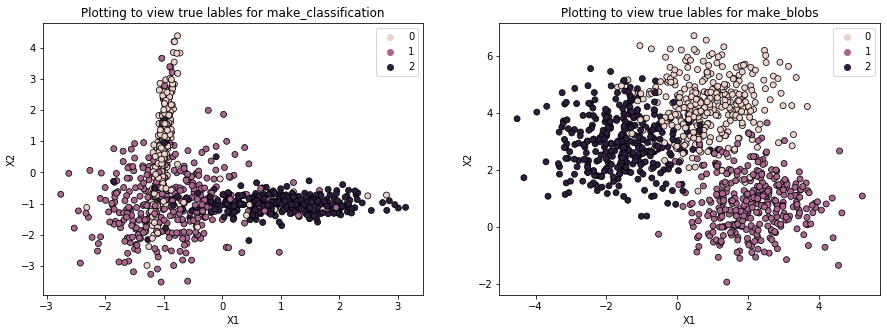

In [16]:
'''Plotting the 2D data'''
f, axes = plt.subplots(2, 2, figsize=(15, 5), sharex=True)
def plotTrueLabels(position,x,y,classType):
    plt.subplot(1,2,position)
    sns.scatterplot(x[:,0],x[:,1],hue=y,edgecolor='black');
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plotting to view true lables for ' + classType)

plotTrueLabels(1,xClass,yClass,'make_classification')
plotTrueLabels(2,xBlobs,yBlobs,'make_blobs')

In [9]:
'''Adding high dimensional noise'''
def addNoise(x,noiseDim,samples=samples,noise_mean=0,noise_std=15):
    noise=np.random.normal(noise_mean,noise_std,[samples,noiseDim])
    data=np.concatenate((x,noise),axis=1)
    return data

In [30]:
def allClustering(noiseRange=100,trialNum=20,samples=samples,features=features_2D):
    '''applying agglomerative and KMeans clustering after adding different dimesions of noise to see 
    how the efficiency changes with the number of noise dimensions'''
    theNoiseDim=[] # storing the number of noise dimensions added
    
    # for make_classification
    aggloNoisyXCl_label=[]
    kMeansNoisyXCl_label=[]# labels corresponding to each trial and each noise level
    spectralNoisyXCl_label=[]
    aggloARICl=[]
    kMeansARICl=[]
    spectralARICl=[]
    totalKMeansARICl=[]
    totalSpectralARICl=[]
    totalAggloARICl=[]
    theNoisyXCl=[] # different dimensions of noise to be added to make_classification dataset
    

    # for make_blobs
    kMeansNoisyXB_label=[]# labels corresponding to each trial and each noise level
    aggloNoisyXB_label=[]
    spectralNoisyXB_label=[]
    aggloARIB=[]
    spectralARIB=[]
    kMeansARIB=[]
    totalAggloARIB=[]
    totalKMeansARIB=[]
    totalSpectralARIB=[]
    theNoisyXB=[] # different dimensions fo data to be added to make_blobs dataset
    
    
    for i in range(0,trialNum):
        '''100 trials'''
        # for make_classification
        aggloNoisyXCl_label.append([])
        kMeansNoisyXCl_label.append([])
        spectralNoisyXCl_label.append([])
        aggloARICl.append([])
        kMeansARICl.append([])
        spectralARICl.append([])
        theNoisyXCl.append([])

        # for make_blos
        aggloNoisyXB_label.append([])
        kMeansNoisyXB_label.append([])
        spectralNoisyXB_label.append([])
        aggloARIB.append([])
        kMeansARIB.append([])
        spectralARIB.append([])
        theNoisyXB.append([])
        
        '''Creating synthetic datasets for every trial as agglomerative custering is deterministic'''
        xCl,yCl=make_classification(n_samples=samples, 
                                    n_features=features,
                                    n_informative=features,
                                    n_redundant=0,
                                    n_repeated=0,
                                    n_classes=clusters,
                                    n_clusters_per_class=1,
                                    flip_y=0.1,
                                    random_state=None,
                                    shuffle=True)
        xB,yB=make_blobs(n_samples=samples, 
                         n_features=features,
                         centers=clusters, 
                         cluster_std=1, 
                         random_state=0,
                         shuffle=True)
        
        ''' iterating with different noise levels'''
        for j in range(1,noiseRange+1):
            noisyXCl=addNoise(xCl,j)
            noisyXB=addNoise(xB,j)

            theNoisyXCl[i].append(noisyXCl)#these are of the dimensions (numTrial)x(noise==>THIS VARIES)x(samples)
            theNoisyXB[i].append(noisyXB)
            
            theNoiseDim.append(j) #to create the dataframe
            
            ''' agglomerative clustering'''
            # for make_classification
            aggloClusterCl=AgglomerativeClustering().fit(theNoisyXCl[i][j-1])
            aggloNoisyXCl_label[i].append(aggloClusterCl.labels_)

            # for make_blobs
            aggloClusterB=AgglomerativeClustering().fit(theNoisyXB[i][j-1])
            aggloNoisyXB_label[i].append(aggloClusterB.labels_)
            
            ''' getting ARI'''
            aggloARICl[i].append(adjusted_rand_score(yCl,aggloNoisyXCl_label[i][j-1])) 
            totalAggloARICl.append(aggloARICl[i][j-1]) # tocreate the dataframe
            
            aggloARIB[i].append(adjusted_rand_score(yB,aggloNoisyXB_label[i][j-1])) 
            totalAggloARIB.append(aggloARIB[i][j-1]) # tocreate the dataframe
            
            ''' spectral clustering'''
            '''# for make_classification
            spectralClusterCl=SpectralClustering().fit(theNoisyXCl[i][j-1])
            spectralNoisyXCl_label[i].append(spectralClusterCl.labels_)

            # for make_blobs
            spectralClusterB=SpectralClustering().fit(theNoisyXB[i][j-1])
            spectralNoisyXB_label[i].append(spectralClusterB.labels_)
            

            spectralARICl[i].append(adjusted_rand_score(yCl,spectralNoisyXCl_label[i][j-1])) 
            totalSpectralARICl.append(spectralARICl[i][j-1]) # tocreate the dataframe
            
            spectralARIB[i].append(adjusted_rand_score(yB,spectralNoisyXB_label[i][j-1])) 
            totalSpectralARIB.append(spectralARIB[i][j-1]) # tocreate the dataframe'''
            
            '''K-Means clustering'''
            # for make_classification
            kMeansClusterCl=KMeans().fit(theNoisyXCl[i][j-1])
            kMeansNoisyXCl_label[i].append(kMeansClusterCl.labels_)

            # for make_blobs
            kMeansClusterB=KMeans().fit(theNoisyXB[i][j-1])
            kMeansNoisyXB_label[i].append(kMeansClusterB.labels_)
            
            kMeansARICl[i].append(adjusted_rand_score(yCl,kMeansNoisyXCl_label[i][j-1])) 
            totalKMeansARICl.append(kMeansARICl[i][j-1]) # tocreate the dataframe
            
            kMeansARIB[i].append(adjusted_rand_score(yB,kMeansNoisyXB_label[i][j-1])) 
            totalKMeansARIB.append(kMeansARIB[i][j-1]) # tocreate the dataframe
            
            '''gaussian mixture model'''
            '''gaussianClusterCl=GaussianMixture().fit(theNoisyXCl[i][j-1])
            gaussianNoisyXCl_label[i].append(gaussianClusterCl.predict(theNoisyXCl[i][j-1]))
            
            gaussianClusterB=GaussianMixture().fit(theNoisyXB[i][j-1])
            gaussianNoisyXB_label[i].append(gaussianClusterB.predict(theNoisyXB[i][j-1]))
            
            gaussianARICl[i].append(adjusted_rand_score(yCl,gaussianNoisyXCl_label[i][j-1])) 
            totalGaussianARICl.append(gaussianARICl[i][j-2]) # tocreate the dataframe

            gaussianARIB[i].append(adjusted_rand_score(yB,gaussianNoisyXB_label[i][j-2])) 
            totalGaussianARIB.append(gaussianARIB[i][j-2]) # tocreate the dataframe'''
            
    return totalAggloARICl,totalAggloARIB,totalKMeansARICl,totalKMeansARIB,theNoiseDim



In [31]:
def allClusteringHighD(maxDim=100,trialNum=20,samples=samples,features=features_2D):
    '''applying agglomerative clustering on data of different dimensions to see 
    how differently the clustering algorithm performs with the number of dimensions'''
    theDim=[] # storing the number of noise dimensions added
    # for make_classification
    aggloXCl_label=[]
    kMeansXCl_label=[]# labels corresponding to each trial and each noise level
    aggloARICl=[]
    kMeansARICl=[]
    totalKMeansARICl=[]
    totalAggloARICl=[]
    theXCl=[] # different dimensions of noise to be added to make_classification dataset
    

    # for make_blobs
    kMeansXB_label=[]# labels corresponding to each trial and each noise level
    aggloXB_label=[]
    aggloARIB=[]
    kMeansARIB=[]
    totalAggloARIB=[]
    totalKMeansARIB=[]
    theXB=[] # different dimensions fo data to be added to make_blobs dataset
    
    
    for i in range(0,trialNum):
        '''100 trials'''
        # for make_classification
        aggloXCl_label.append([])
        kMeansXCl_label.append([])
        aggloARICl.append([])
        kMeansARICl.append([])
        theXCl.append([])

        # for make_blos
        aggloXB_label.append([])
        kMeansXB_label.append([])
        aggloARIB.append([])
        kMeansARIB.append([])
        theXB.append([])

        for j in range(2,maxDim+1):
            '''making new set of synthetic data corresponding to each dimension for each iteration'''
            xCl,yCl=make_classification(n_samples=samples, 
                                        n_features=j,
                                        n_informative=j,
                                        n_redundant=0,
                                        n_repeated=0,
                                        n_classes=clusters,
                                        n_clusters_per_class=1,
                                        flip_y=0.1,
                                        random_state=None,
                                        shuffle=True)
            xB,yB=make_blobs(n_samples=samples, 
                             n_features=j,
                             centers=clusters, 
                             cluster_std=1, 
                             random_state=0,
                             shuffle=True)

            theXCl[i].append(xCl)
            theXB[i].append(xB)
            
            theDim.append(j)
            
            ''' agglomerative clustering'''
            # for make_classification
            aggloClusterCl=AgglomerativeClustering().fit(theXCl[i][j-2])
            aggloXCl_label[i].append(aggloClusterCl.labels_)

            # for make_blobs
            aggloClusterB=AgglomerativeClustering().fit(theXB[i][j-2])
            aggloXB_label[i].append(aggloClusterB.labels_)
            
            ''' getting ARI'''
            aggloARICl[i].append(adjusted_rand_score(yCl,aggloXCl_label[i][j-2])) 
            totalAggloARICl.append(aggloARICl[i][j-2]) # tocreate the dataframe

            aggloARIB[i].append(adjusted_rand_score(yB,aggloXB_label[i][j-2])) 
            totalAggloARIB.append(aggloARIB[i][j-2]) # tocreate the dataframe
            
            ''' KMeans clustering'''
            # for make_classification
            kMeansClusterCl=KMeans().fit(theXCl[i][j-2])
            kMeansXCl_label[i].append(kMeansClusterCl.labels_)

            # for make_blobs
            kMeansClusterB=KMeans().fit(theXB[i][j-2])
            kMeansXB_label[i].append(kMeansClusterB.labels_)
            
            ''' getting ARI'''
            kMeansARICl[i].append(adjusted_rand_score(yCl,kMeansXCl_label[i][j-2])) 
            totalKMeansARICl.append(kMeansARICl[i][j-2]) # tocreate the dataframe

            kMeansARIB[i].append(adjusted_rand_score(yB,kMeansXB_label[i][j-2])) 
            totalKMeansARIB.append(kMeansARIB[i][j-2]) # tocreate the dataframe
                   
    return totalAggloARICl,totalAggloARIB,totalKMeansARICl,totalKMeansARIB,theDim

AggloARICl,AggloARIB,KMeansARICl,KMeansARIB,theNoiseDim=allClustering()
AggloARICl_2,AggloARIB_2,KMeansARICl_2,KMeansARIB_2,theDim=allClusteringHighD()

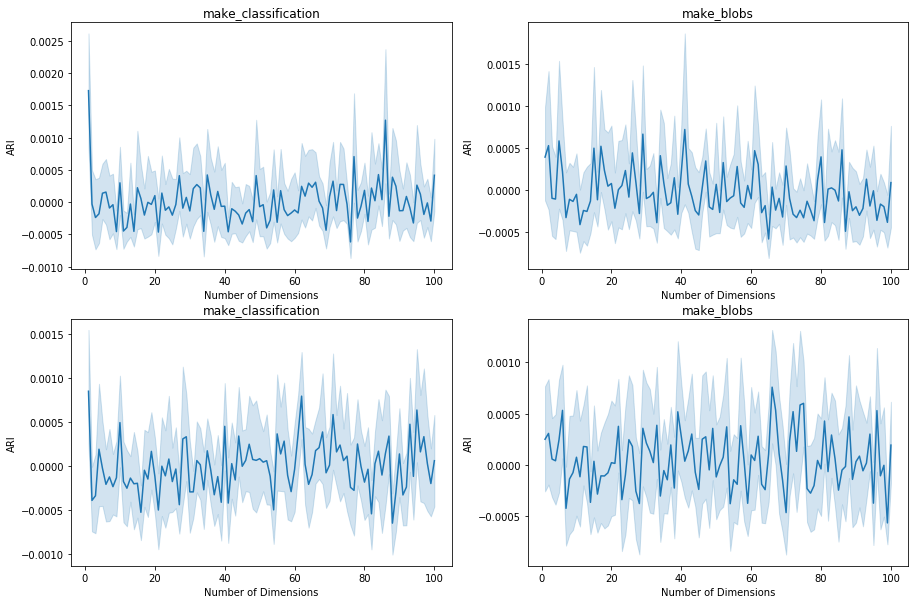

In [34]:
'''plotting ARI vs number of noise dimensions'''
def Plot(x,y,z,dimensions,RandIndex,title):
    plt.subplot(x,y,z)
    data={'Number of Noise Dimensions':dimensions,'ARI':RandIndex}
    sns.lineplot(x='Number of Noise Dimensions',y='ARI',data=data)
    plt.xlabel('Number of Dimensions')
    plt.ylabel('ARI')
    plt.title(title)
    maxid = np.argmax(RandIndex) # The id of the peak (maximum of Rand_Index-2D)

f, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
Plot(2,2,1,theNoiseDim,AggloARICl,'make_classification')
Plot(2,2,2,theNoiseDim,AggloARIB,'make_blobs')
Plot(2,2,3,theNoiseDim,KMeansARICl,'make_classification')
Plot(2,2,4,theNoiseDim,KMeansARIB,'make_blobs')


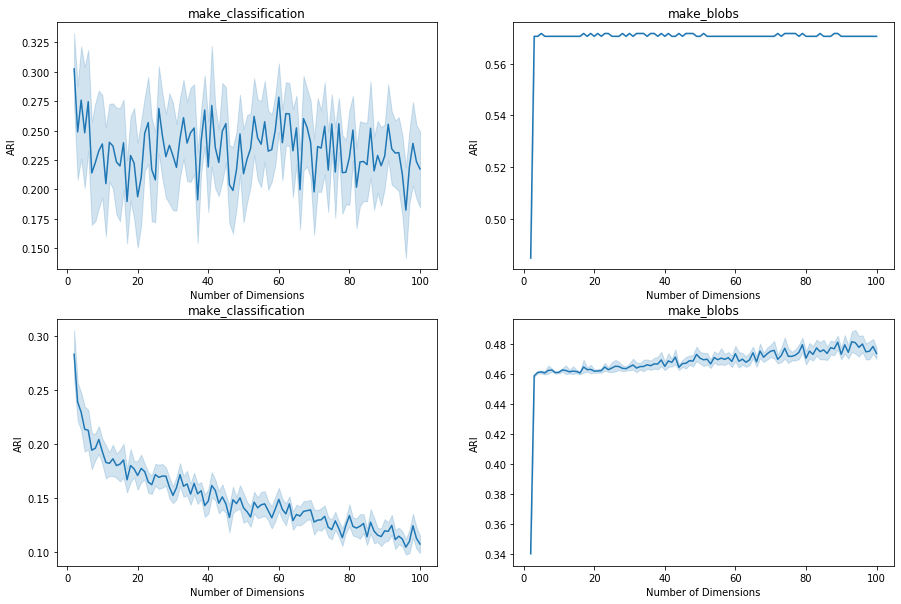

In [35]:
'''plotting ARI vs number of dimensions'''
def Plot(x,y,z,dimensions,RandIndex,title):
    plt.subplot(x,y,z)
    data={'Number of Noise Dimensions':dimensions,'ARI':RandIndex}
    sns.lineplot(x='Number of Noise Dimensions',y='ARI',data=data)
    plt.xlabel('Number of Dimensions')
    plt.ylabel('ARI')
    plt.title(title)
    maxid = np.argmax(RandIndex) # The id of the peak (maximum of Rand_Index-2D)

f, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
Plot(2,2,1,theDim,AggloARICl_2,'make_classification')
Plot(2,2,2,theDim,AggloARIB_2,'make_blobs')
Plot(2,2,3,theDim,KMeansARICl_2,'make_classification')
Plot(2,2,4,theDim,KMeansARIB_2,'make_blobs')